In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv("..\..\datasets\insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance = pd.get_dummies(insurance)
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
insurance.drop(['sex_female', 'smoker_no'], axis = 1,inplace = True)
insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [6]:
insurance.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [7]:
X = insurance[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']]
y= insurance['charges']
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,0
3,33,22.705,0,1,0,0,1,0,0
4,32,28.880,0,1,0,0,1,0,0


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X)
c = X.columns
c

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [11]:
X = scaler.transform(X)
X

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [12]:
X = pd.DataFrame(X, columns=c)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1046,0.270064,-0.915925,-0.908614,-1.010519,-0.507463,1.769076,-0.566418,-0.611324,-0.566418
682,-0.014740,0.760609,0.751079,0.989591,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1037,0.412467,-0.027625,-0.078767,-1.010519,1.970587,-0.565267,1.765481,-0.611324,-0.566418
490,-1.438764,0.366902,-0.908614,-1.010519,-0.507463,-0.565267,-0.566418,-0.611324,1.765481
39,1.480485,1.515214,-0.908614,0.989591,1.970587,-0.565267,-0.566418,-0.611324,1.765481


In [15]:
y_test = pd.DataFrame(y_test, columns= ['charges'])
y_train = pd.DataFrame(y_train, columns= ['charges'])
y_train.head()

,charges
1046,7325.04820
682,40103.89000
1037,39725.51805
490,1748.77400
39,48173.36100


In [25]:
len(X_train.columns)

9

In [31]:
tf.random.set_seed(42)

model = tf.keras.Sequential(name = 'scaledVals_insm')

model.add(tf.keras.layers.Dense(10, input_shape=[len(X_train.columns)], name = 'input_layer'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1, name = 'output_layer'))

model.compile(loss = tf.keras.losses.mse,
              optimizer= tf.keras.optimizers.Adam(),
             metrics = ['mse'])


In [28]:
from tensorflow.keras.utils import plot_model

In [32]:
model.summary()

Model: "scaledVals_insm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                100       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train , epochs =100, verbose=0)

Text(0.5, 0, 'epochs')

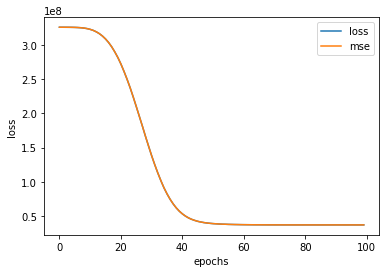

In [35]:
#plot history
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [41]:
y_pred = pd.DataFrame(model.predict(X_test) , columns=['charges'])
y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  442 non-null    float32
dtypes: float32(1)
memory usage: 1.9 KB


In [49]:
len(X_test) == len(y_pred)

True

In [54]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 572us/step - loss: 35100508.0000 - mse: 35100508.0000


[35100508.0, 35100508.0]